<table align='center' width=100%>
    <tr bgcolor='pink'>
        <td width='15%'>
            <img src='logo.png'>
        </td>
        <td>
            <div align='center'>
                <font color='teal' size=8px >
                    <b>TELECOM RETENTION
                    </b>
                </font><br>
                <font color='teal' size=4px >
                    <b>USING DATA SCIENCE  TO ADDRESS CUSTOMER CHURN
                    </b>
                </font>
            </div>    
        </td>
    </tr>
</table>

<b>Problem Statement -</b> Telecom Retention  is very helpful for company to identify its loyal customer  as well as to build new Strategies for customer who likely to churn. The 
objective of this model is to provide quick, immediate and easy way to spot customer who are going to churn in near future. It can provide insights that which metrics are useful in Customer retention.


### Features Explanations :<br>
<b>customerID : </b>Identification number of customer.<br>
<b>gender : </b>Gender of customer (male or female).<br>
<b>SeniorCitizen : </b>1- if customer is senior citizen and 0 if cusotmer is not senior citizen. <br>
<b>Partner : </b>Yes- if customer have partner and no if customer have not partner.<br>
<b>Dependents : </b>if customer have dependent and no if customer have not dependent.<br>
<b>Tenure : </b>- Number of months the customer has stayed with the company.<br>
<b>PhoneService : </b>Yes- for the usage of phone service and no- for not using phone services.<br>
<b>MultipleLines : </b>Whether customer uses multiple lines or not.<br>
<b>InternetService : </b>- Customer’s internet service provider (DSL, Fiber optic, No).<br>
<b>OnlineSecurity : </b>Whether the customer has online security or not (Yes, No, No internet service).<br>
<b>OnlineBackup : </b>- Whether the customer has an online backup or not (Yes, No, No internet
service).<br>
<b>DeviceProtection : </b>n - Whether the customer has device protection or not (Yes, No, No internet service).<br>
<b>TechSupport : </b>Whether the customer has tech support or not (Yes, No, No internet service).<br>
<b>StreamingTV : </b>Whether the customer has streaming TV or not (Yes, No, No internet service).<br>
<b>StreamingMovies : </b>Whether the customer has streaming movies or not (Yes, No, No internet service).<br>
<b>Contract : </b>Type of contract taken by customer.<br>
<b>PaperlessBilling : </b>Whether billing is paperless or not.<br>
<b>PaymentMethod : </b>what type of payment method is used.<br>
<b>MonthlyCharges : </b>Monthly charges of Customer.<br>
<b>TotalCharges : </b>Whole charges of customer.<br>
<b>Churn : </b> 1 if customer is likely to churn  and 0 if cusotmer is not likely to churn.<br>

### Exploratory Data Analysis

In [201]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows=None
pd.options.display.max_columns=None

from warnings import filterwarnings
filterwarnings(action='ignore')

In [202]:
# Load the dataset
Tele_retention = pd.read_csv('Telco-Customer-Churn.csv')

# Check for first five record
Tele_retention.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the Various Attributes of data like shape(rows and columns ),datatypes.

In [203]:
# The data has 7043 records and 21 columns
Tele_retention.shape

(7043, 21)

In [204]:
# columns name
Tele_retention.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [205]:
# Check the descriptive statistics of numeric variables
Tele_retention.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not appeared.<br>
75% customers have tenture less than 55 months.<br>
Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.

In [206]:
# Check the descriptive statistics of numeric variables
Tele_retention.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,4020-KIUDI,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# Insights from categorical variables.
Frequently used Internet Service is Fiber optic.<br>
Mostly customer taken month-to-month contract.<br>
Electronic Check is most preferred payment method.<tr>
TotalCharges column is not categorical column because its unique value count is very high.

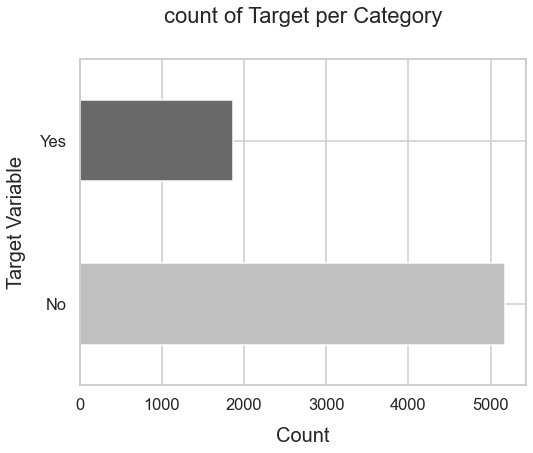

In [207]:
# Distribution of Churn rate 
Tele_retention['Churn'].value_counts().plot(kind='barh',figsize=(8,6),color=['silver','dimgray'])
# silver color shows customer are loyal, and dimgray color shows customer who likely to churn.
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target Variable',labelpad=14)
plt.title('count of Target per Category',y=1.02)
plt.show()

In [208]:
# Percentage of churners and non-churners.
100*Tele_retention['Churn'].value_counts()/len(Tele_retention['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced, ratio = 73.27 <br>
So we analyse the data with other features while taking the target values separately to get some insights.m

In [213]:
# Concise summary of the dataframe, as we have too many columns, we are using the verbose = True mode.
Tele_retention.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


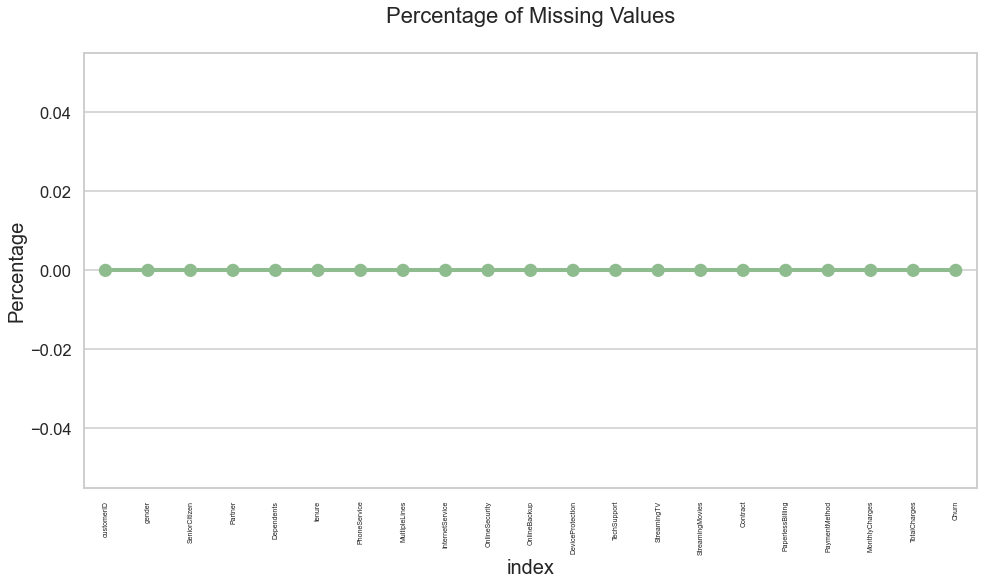

In [214]:
# Pointplot for calculating percentage of missing values
missing = pd.DataFrame((Tele_retention.isnull().sum())*100/Tele_retention.shape[0]).reset_index()
plt.figure(figsize=(16,8))
ax = sns.pointplot('index',0,data=missing,color='darkseagreen')
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of Missing Values')
plt.ylabel('Percentage')
plt.show()

### Missing Data - Initial Intuition<br>
Here, we don't have any missing data

### General Thump Rules :
<br> For features with less missing values - can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
<br> For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
<br> As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30% - 40% of missing values. But again there's a catch here, for example, IS_car & Car_Type, People having no cars ,will obviously have car_type as NaN(null), but that doesn't make this column useless, so decisions has to be taken wisely.<br>
For features with less percentage of null values we should delete those rows, the null value percentage should be less than 5%-15%.<br>
For features where null value percentage is more than 15% so we can use method to fill the columns with median , mean or mode or we can use backward or forward filling according to column's need.

### Data Cleaning

#### 1. Create a copy of base data for manipulation & precrossing

In [224]:
dff = Tele_retention.copy()

#### 2. Total charges should be numeric amount. Let's convert it to numerical data type

In [225]:
dff.TotalCharges =  pd.to_numeric(dff.TotalCharges,errors='coerce')
dff.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### 3. As we can see there are 11 missing values in 'TotalCharges' column.Let's check these records.

In [226]:
dff.loc[dff['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### 4. Missing Value Treatment<br>
Since the % of these records compared to total dataset is very low .i.es 0.15%, it is safe to ignore them from further processing.

In [227]:
# Removing missing Values row.
dff.dropna(how='any',inplace=True)

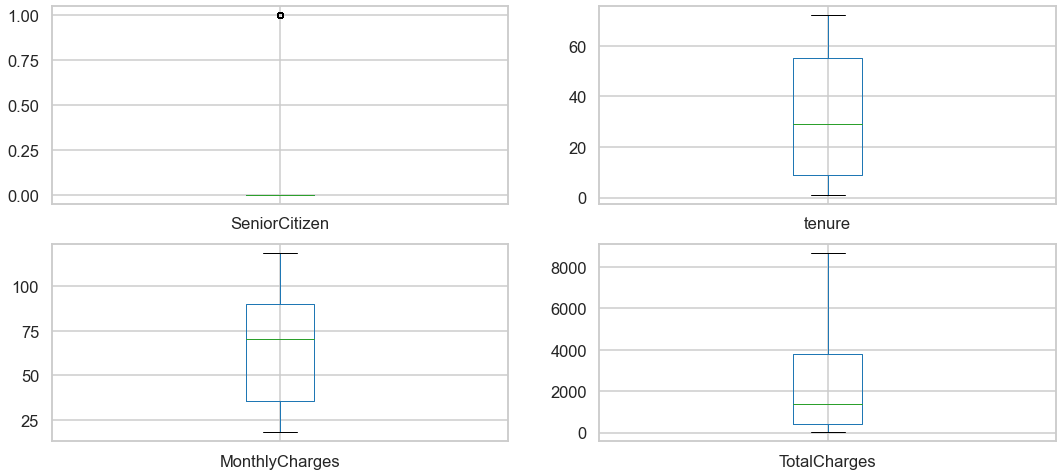

In [228]:
# Check for outliers
dff.plot(kind='box',subplots=True,layout=(2,2),figsize=(18,8))
plt.show()

In [229]:
# data have no outliers

#### 5. Dividing customers into bins based on  tenture e.g. for tenture < 12 months : assign a tenture group if 1-12, for tenture between 1 to 2 yrs tenture group of 13-24; so on ...

In [159]:
# Get the max tenture
print(dff['tenure'].max())
# Tenure have 72 months.

72


In [160]:
# Group the tenure in bins of 12 months
labels = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]    # using list comprehension

dff['tenure_group'] = pd.cut(dff.tenure,range(1,80,12),right=False,labels=labels)

In [161]:
dff['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
49-60     832
25-36     832
37-48     762
Name: tenure_group, dtype: int64

#### 6. Remove columns not required for processing.

In [162]:
# drop column customerID and tenure
dff.drop(columns=['customerID'],axis=1,inplace=True)
dff.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


### Data Exploration

*plot distribution of individual predictors by churn.

#### Univariate Analysis

        Churn      
gender Female  Male
Churn              
No       2544  2619
Yes       939   930


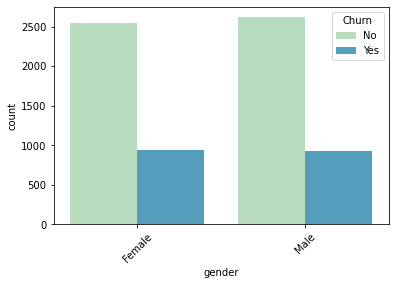

              Churn     
SeniorCitizen     0    1
Churn                   
No             4497  666
Yes            1393  476


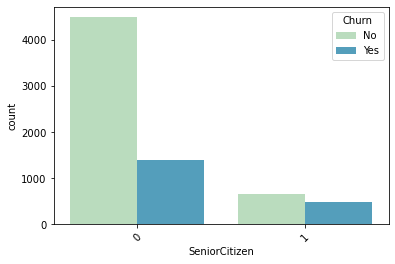

        Churn      
Partner    No   Yes
Churn              
No       2439  2724
Yes      1200   669


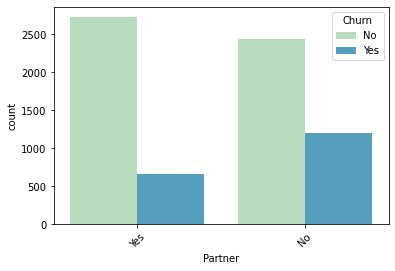

           Churn      
Dependents    No   Yes
Churn                 
No          3390  1773
Yes         1543   326


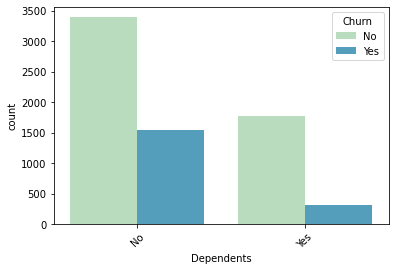

             Churn      
PhoneService    No   Yes
Churn                   
No             510  4653
Yes            170  1699


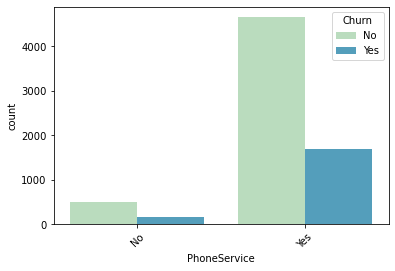

              Churn                       
MultipleLines    No No phone service   Yes
Churn                                     
No             2536              510  2117
Yes             849              170   850


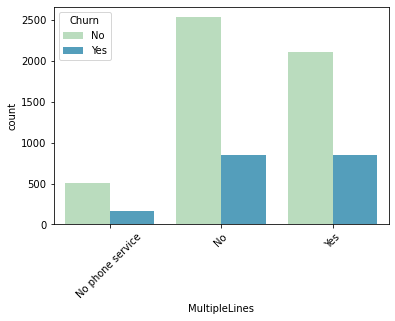

                Churn                  
InternetService   DSL Fiber optic    No
Churn                                  
No               1957        1799  1407
Yes               459        1297   113


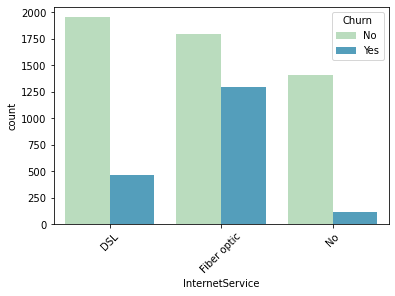

               Churn                          
OnlineSecurity    No No internet service   Yes
Churn                                         
No              2036                1407  1720
Yes             1461                 113   295


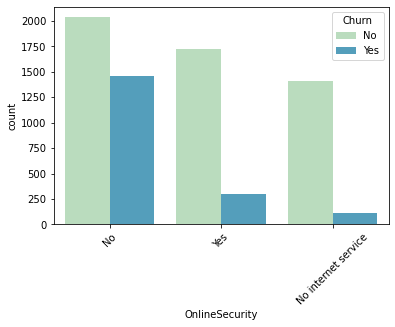

             Churn                          
OnlineBackup    No No internet service   Yes
Churn                                       
No            1854                1407  1902
Yes           1233                 113   523


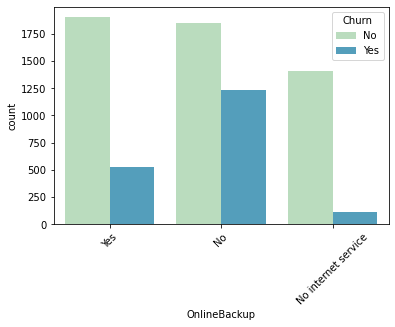

                 Churn                          
DeviceProtection    No No internet service   Yes
Churn                                           
No                1883                1407  1873
Yes               1211                 113   545


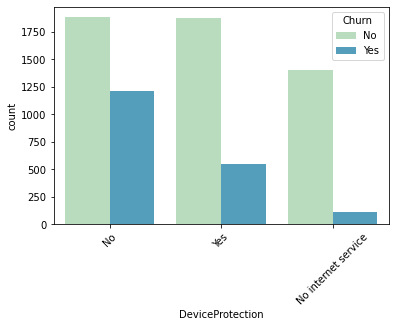

            Churn                          
TechSupport    No No internet service   Yes
Churn                                      
No           2026                1407  1730
Yes          1446                 113   310


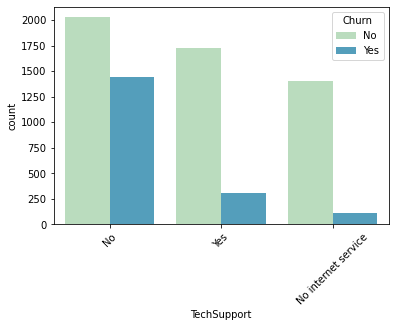

            Churn                          
StreamingTV    No No internet service   Yes
Churn                                      
No           1867                1407  1889
Yes           942                 113   814


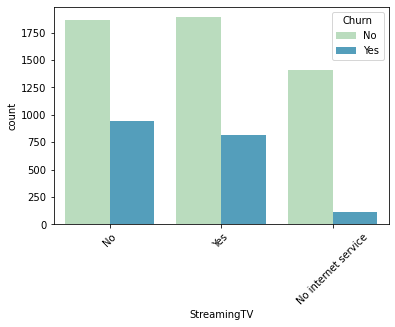

                Churn                          
StreamingMovies    No No internet service   Yes
Churn                                          
No               1843                1407  1913
Yes               938                 113   818


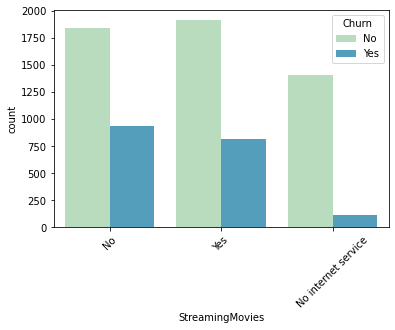

                  Churn                  
Contract Month-to-month One year Two year
Churn                                    
No                 2220     1306     1637
Yes                1655      166       48


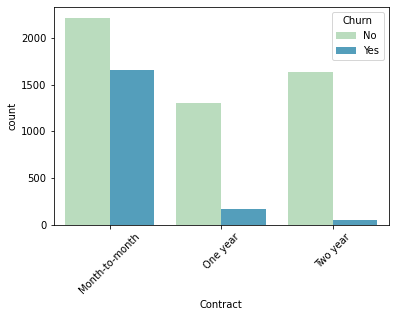

                 Churn      
PaperlessBilling    No   Yes
Churn                       
No                2395  2768
Yes                469  1400


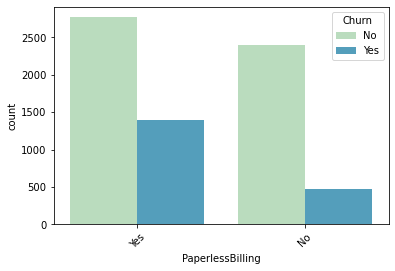

                                  Churn                          \
PaymentMethod Bank transfer (automatic) Credit card (automatic)   
Churn                                                             
No                                 1284                    1289   
Yes                                 258                     232   

                                             
PaymentMethod Electronic check Mailed check  
Churn                                        
No                        1294         1296  
Yes                       1071          308  


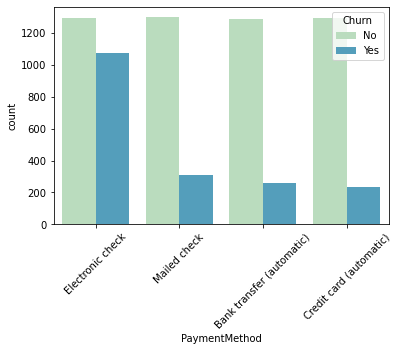

             Churn                              
tenure_group  1-12 13-24 25-36 37-48 49-60 61-72
Churn                                           
No            1138   730   652   617   712  1314
Yes           1037   294   180   145   120    93


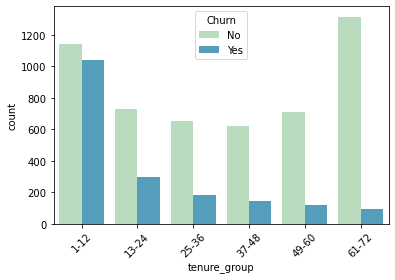

In [163]:
for i, predictor in enumerate(dff.drop(columns=['Churn','TotalCharges','MonthlyCharges','tenure'],axis=1)):
    print(pd.pivot_table(data=dff,index=dff['Churn'],columns=dff[predictor],values=['Churn'],aggfunc=np.size))
    
    plt.figure(i)
    sns.countplot(data=dff,x=predictor,hue='Churn',palette='GnBu')
    plt.xticks(rotation='45')
    plt.show()


#### Insights <br>
The churning ratio of male and female is nearly equal.<br>
Senior citizens are less likely to churn.<br>
Customer who haven’t any partner or dependent are more likely to churn.<br>
Customers who uses phoneservice are more likely to  churn.<br>
Where no phone servies, customer less likely to churn.<br>
Number of customers who uses fiber optic are more.<br>
Customers churn rate is more where tech-support, device protection, streaming TV-movies, online security and online backup is not provided.<br>
Customers who are on monthly contract are more likely to churn.<br>
Number of PaperlessBilling customer is more likely to churn.<br>
People who use electronic check payment method  are more likely to churn.<br>
1-12 are group people are high churner.<br>


2. Convert the Target variable 'Churn' in a binary numeric variable i.e. yes=1; No =0

In [164]:
dff['Churn'] = np.where(dff.Churn=='Yes',1,0)

In [165]:
dff.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


3. Convert all the categorical variable into dummy  variable.

In [166]:
dff_cat = pd.get_dummies(dff)
dff_cat.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


*9. *Relationship between Monthly Charges ana Total Charges

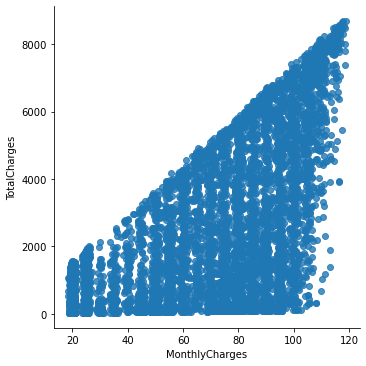

In [178]:
sns.lmplot(data=dff,x='MonthlyCharges',y='TotalCharges',fit_reg=False)
plt.show()

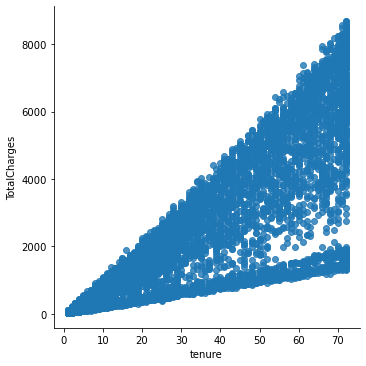

In [179]:
sns.lmplot(data=dff,x='tenure',y='TotalCharges',fit_reg=False)
plt.show()

Total Charges increase as Monthly Charges increase - as expected.<br>
With the increase in age total charges also increases.

*10. * Churn by Monthly Charges and Total Charges

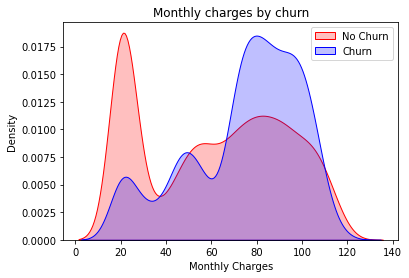

In [83]:
mth = sns.kdeplot(dff_cat.MonthlyCharges[(dff_cat['Churn']==0)],color='Red',shade=True)
sns.kdeplot(dff_cat.MonthlyCharges[(dff_cat['Churn']==1)],ax=mth,color='Blue',shade=True)
mth.legend(['No Churn','Churn'],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly charges by churn')
plt.show()

<b> Insight :</b>Churn is high when Monthly Charges are high.

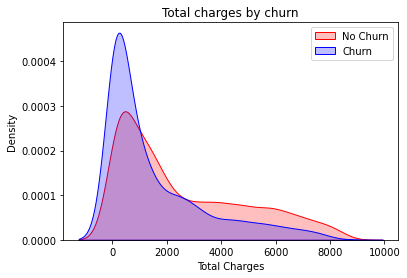

In [84]:
tot = sns.kdeplot(dff_cat.TotalCharges[(dff.Churn==0)],color='Red',shade=True)
tot = sns.kdeplot(dff_cat.TotalCharges[(dff.Churn==1)],ax=tot,color='Blue',shade=True)

tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total charges by churn')
plt.show()

*Surprising insight * as higher Churn at lower Total Charges.<br>
<br>
However if we combine the insights of 3 parameters i.e. Tenure,Monthly Charges & Total Charges then the picture is bit clear: -
    Higher Monthly Charge at Lower tenure results into lower total charge. Hence, all these 3 factors viz Higher Monthly Charge,Lower Tenure and Lower Total Charge are linked to high churn.

*11. Build a corelation of all predictors with 'Churn'.*

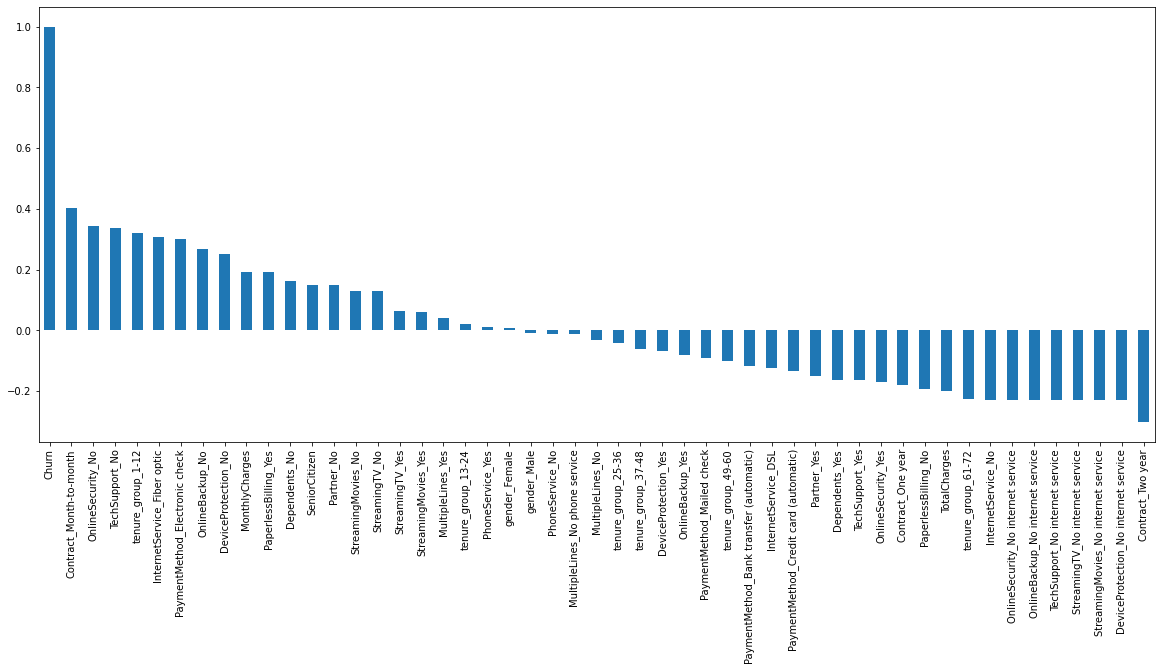

In [86]:
plt.figure(figsize=(20,8))
dff_cat.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

*Derived Insight:*<br>
High Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet.<Br>
Low Churn seen in case of Long term contracts, Subsciptions without internet service and The customers engaged for 5+ years.<br>
Factors like Gender, Availability of PhoneService and # of multiple lines have almost No impact on Churn.<br>
<br>
This is also evident from the Heatmap below.

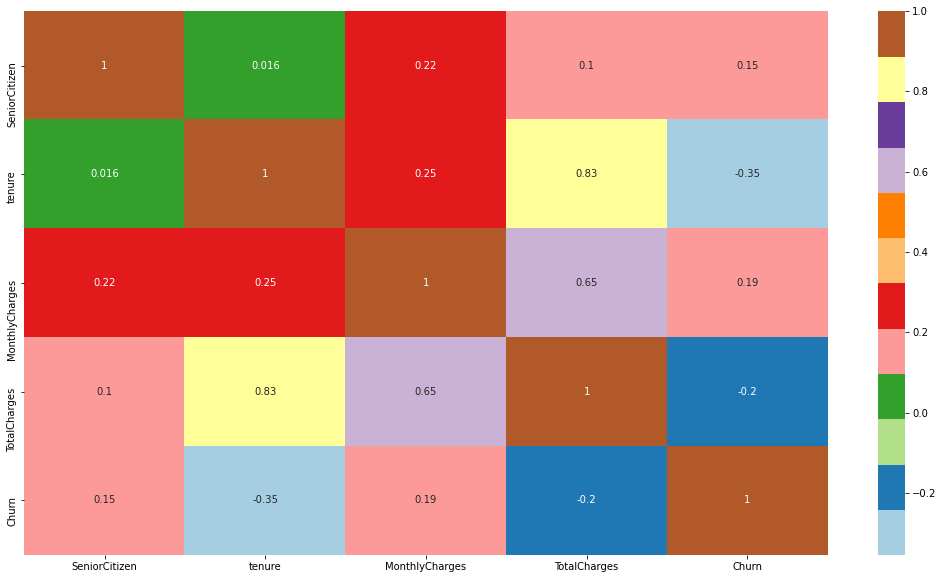

In [182]:
plt.figure(figsize=(18,10))
sns.heatmap(dff.corr(),cmap='Paired',annot=True)
plt.show()

In [183]:
# High Multicollinearity Present between Total Charges and Tenure.

### Bivariate Analysis

In [184]:
# seperate dataframe for churner and non-churners
new_dff_0 = dff.loc[dff.Churn==0]      # for non-churners
new_dff_1 = dff.loc[dff.Churn==1]      # for churners


In [191]:
# define a function to plot bargraph for Bivariate Analysis.
# here, we only use churner dataset.
def biplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    temp = pd.Series(data=hue)
    fig,ax= plt.subplots()
    width = len(df[col].unique())+4*len(temp.unique())
    fig.set_size_inches(width,5)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

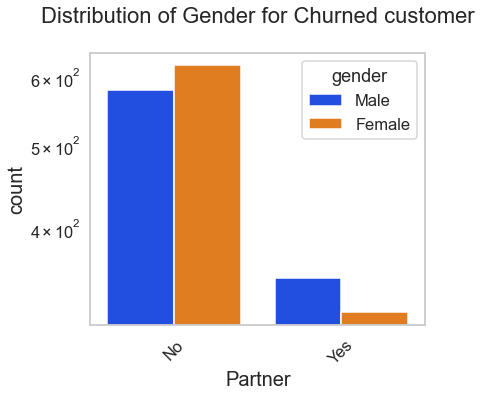

In [192]:
biplot(new_dff_1,col='Partner',title='Distribution of Gender for Churned customer',hue='gender')

Female who haven't any partner are more likely to churn.

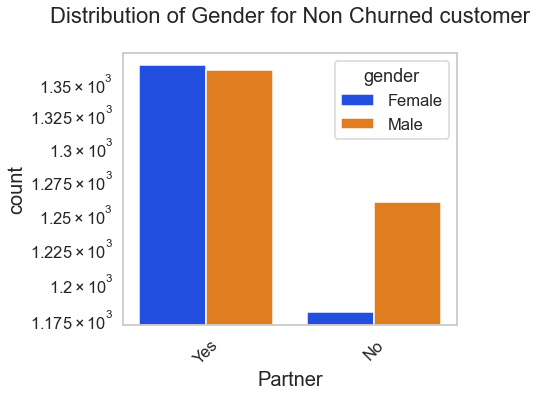

In [193]:
biplot(new_dff_0,col='Partner',title='Distribution of Gender for Non Churned customer',hue='gender')

Female and male will not churn if they have partners.

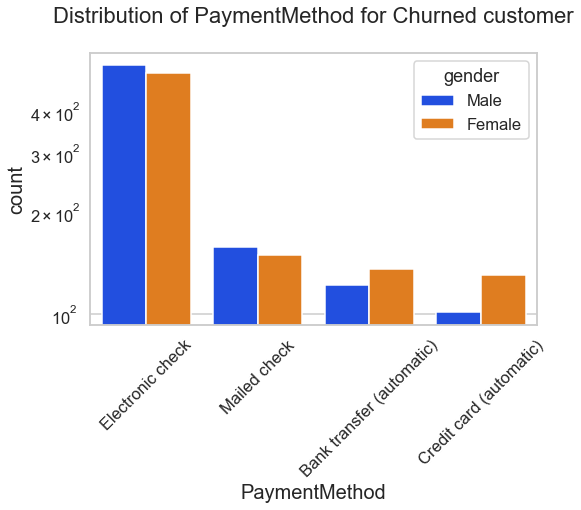

In [194]:
biplot(new_dff_1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned customer',hue='gender')

Both gender churn who uses elctronic payment method.

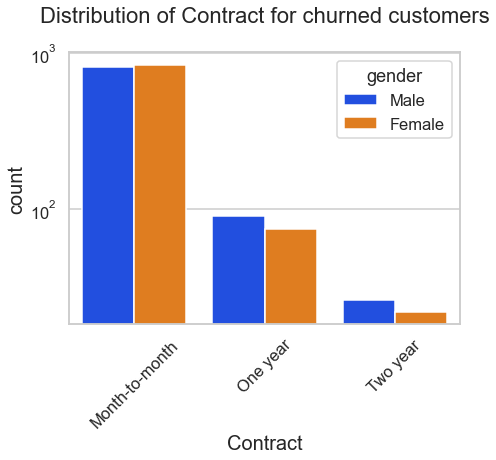

In [196]:
biplot(new_dff_1,col='Contract',title='Distribution of Contract for churned customers',hue='gender')

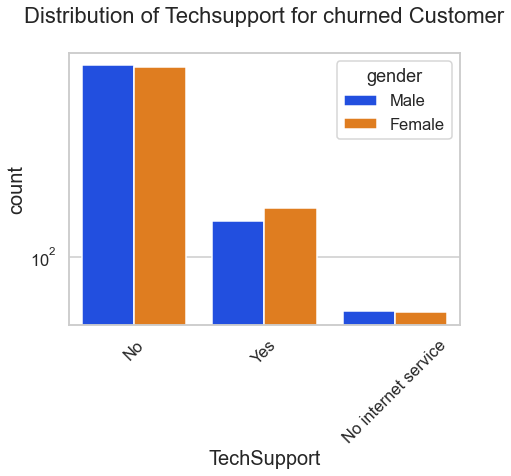

In [197]:
biplot(new_dff_1,col='TechSupport',title='Distribution of Techsupport for churned Customer',hue='gender')

Both gender are in equal ratio to churn when tech support is not provided.

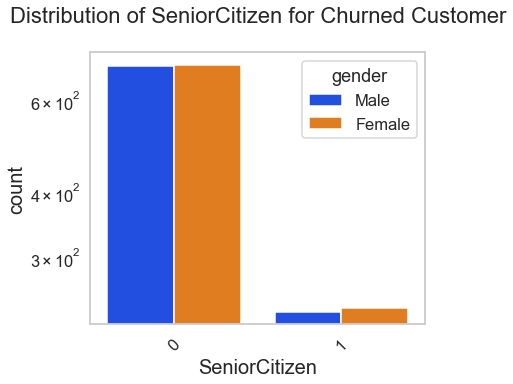

In [199]:
biplot(new_dff_1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customer',hue='gender')

##CONCLUSION <BR>
There are some of the quick insights from this exercise :<br>
1. Electronic check medium are the heighest churners.<br>
2. Contract Type - Monthly customer are morelikely to churn because of no contract terms, as they are free to go customer.<br>
3. No Online security.No Tech Support category are high churners.<br>
4. Non senior Citizenare high churners.<br>


In [200]:
dff_cat.to_csv('tel_churn_visualize.csv')

In [ ]:
# Saving the file into csv for futher use.